#  **K means algorithm**


1.Create an unlabelled dataset composed of five blobs. Decide on the value of K after visualizing the data. Train K means algorithm on this dataset. Display the predicted value and the cluster centroids.
Assign the new instance ([0,2], [3,2], [-3,3], [-3,2.5]) to the closest cluster

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans


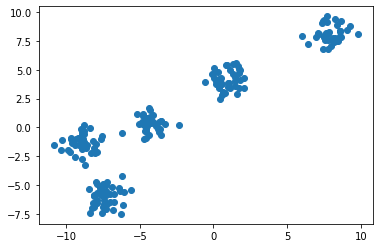

In [2]:
# unlabelled dataset composed of five blobs
blobs= 5 # number of blobs
X, y = make_blobs(n_samples=200, centers=blobs, cluster_std=0.70, random_state=3) # cluster standard deviation is 0.70 and 200 data samples
plt.scatter(X[:,0], X[:,1])

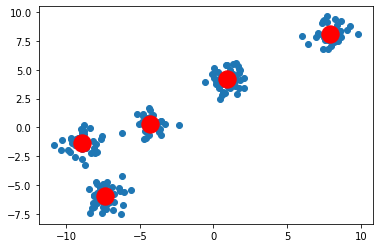

In [3]:
# Decide on the value of K after visualizing the data
k= 5

kmeans = KMeans(n_clusters=k, init='k-means++',
                max_iter=300, n_init=10, random_state=0)

# Train K means algorithm on this dataset
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


In [4]:
test_set= [[0,2], [3,2], [-3,3], [-3,2.5]]
test_set= np.array(test_set)
test_set

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

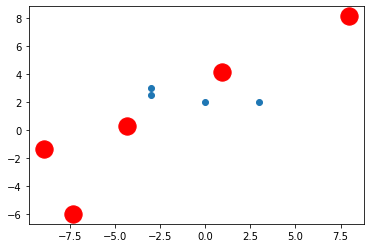

In [5]:
# Assign the new instance ([0,2], [3,2], [-3,3], [-3,2.5]) to the closest cluster
pred_test_y = kmeans.predict(test_set)
plt.scatter(test_set[:, 0], test_set[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


#  **Hierarchical clustering algorithm**


2.Implement Hierarchical clustering algorithm for the dataset formed in the above program. Plot the dendrogram. Mark the cuts in the tree that signify 3,4 and 5 clusters.

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


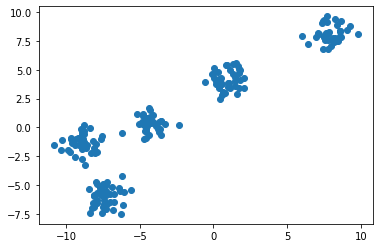

In [7]:
# unlabelled dataset composed of five blobs
blobs= 5 # number of blobs
X, y = make_blobs(n_samples=200, centers=blobs, cluster_std=0.70, random_state=3) # cluster standard deviation is 0.70 and 200 data samples
plt.scatter(X[:,0], X[:,1])

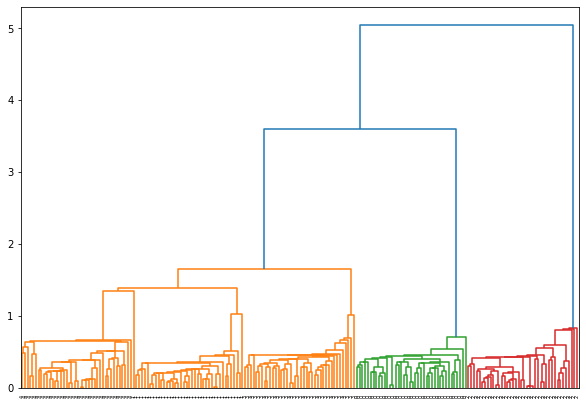

In [8]:
# Plot the dendrogram
linked = linkage(X, 'single')

labelList = y

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


In [9]:
k= 5
cluster = AgglomerativeClustering(
    n_clusters=k, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)


array([3, 0, 0, 0, 2, 0, 1, 2, 1, 3, 4, 0, 4, 3, 4, 1, 4, 1, 2, 3, 3, 0,
       0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 4, 1, 2, 4, 3, 2,
       4, 4, 1, 3, 0, 1, 4, 4, 1, 2, 4, 2, 4, 2, 3, 4, 0, 0, 1, 3, 1, 0,
       1, 2, 2, 1, 1, 0, 3, 4, 1, 4, 4, 2, 4, 2, 0, 2, 1, 4, 3, 3, 3, 2,
       2, 3, 2, 0, 4, 0, 3, 3, 4, 1, 4, 3, 2, 3, 3, 0, 3, 3, 1, 0, 0, 1,
       1, 4, 2, 3, 2, 2, 4, 2, 0, 1, 1, 3, 4, 3, 1, 4, 0, 3, 1, 0, 2, 0,
       2, 4, 1, 3, 2, 2, 2, 4, 3, 2, 3, 0, 3, 0, 3, 4, 0, 1, 4, 3, 4, 3,
       0, 1, 3, 0, 1, 4, 2, 4, 1, 0, 3, 1, 2, 3, 4, 2, 0, 3, 4, 2, 3, 0,
       0, 4, 3, 2, 4, 1, 0, 0, 2, 4, 3, 3, 4, 0, 1, 4, 4, 0, 1, 2, 2, 1,
       1, 0], dtype=int64)

In [10]:
print(cluster.labels_)

[3 0 0 0 2 0 1 2 1 3 4 0 4 3 4 1 4 1 2 3 3 0 0 2 1 0 1 2 0 1 0 1 1 2 2 2 0
 1 4 1 2 4 3 2 4 4 1 3 0 1 4 4 1 2 4 2 4 2 3 4 0 0 1 3 1 0 1 2 2 1 1 0 3 4
 1 4 4 2 4 2 0 2 1 4 3 3 3 2 2 3 2 0 4 0 3 3 4 1 4 3 2 3 3 0 3 3 1 0 0 1 1
 4 2 3 2 2 4 2 0 1 1 3 4 3 1 4 0 3 1 0 2 0 2 4 1 3 2 2 2 4 3 2 3 0 3 0 3 4
 0 1 4 3 4 3 0 1 3 0 1 4 2 4 1 0 3 1 2 3 4 2 0 3 4 2 3 0 0 4 3 2 4 1 0 0 2
 4 3 3 4 0 1 4 4 0 1 2 2 1 1 0]


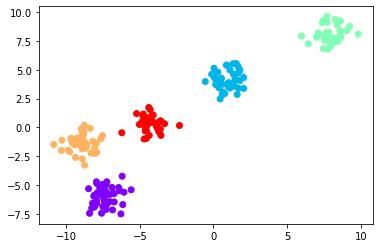

In [11]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

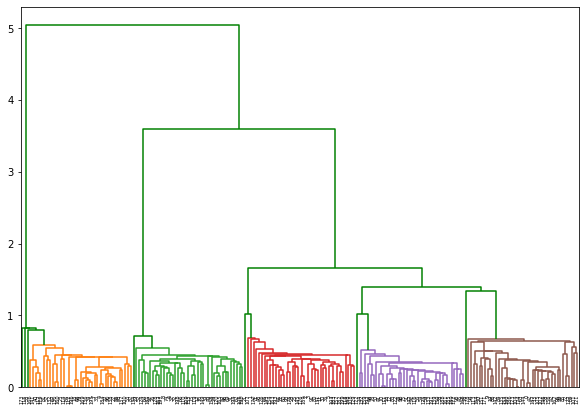

In [12]:
from scipy.cluster import hierarchy
temp = hierarchy.linkage(X, 'single')
plt.figure(figsize=(10, 7))

dn = hierarchy.dendrogram(
    temp, above_threshold_color="green", color_threshold=.7)


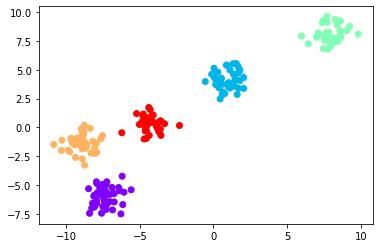

In [13]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [14]:
l = len(X)
for i in range(l):
    c = cluster.labels_[i]
    if c == 3 or c == 4 or c == 5:
        print(f'{X[i]}:    {c}')


[-9.66771191 -0.94314696]:    3
[-8.31501313 -2.2284811 ]:    3
[-3.59681449  0.56103534]:    4
[-4.23611389  0.40980005]:    4
[-8.88153997 -1.01928422]:    3
[-4.29956829  1.55304587]:    4
[-4.02388004  0.41747672]:    4
[-8.0621416  -2.24445409]:    3
[-8.1894943  -1.20501548]:    3
[-4.85390255  0.48065877]:    4
[-3.73036183  0.43569437]:    4
[-8.99994689 -1.374718  ]:    3
[-4.70923958 -1.00432507]:    4
[-3.61153504 -0.14744212]:    4
[-9.66951275 -1.00573182]:    3
[-3.31847549  0.32084258]:    4
[-4.28033924  0.91451396]:    4
[-4.54355877  0.08420194]:    4
[-5.03653657  0.25828291]:    4
[-8.77242579 -1.22885525]:    3
[-4.68970866  0.19209173]:    4
[-9.3037855  -0.97601196]:    3
[-9.76802369 -2.10922394]:    3
[-4.76587312  1.15804682]:    4
[-4.09229975  1.08568367]:    4
[-6.22292165 -0.46373625]:    4
[-4.54959047 -0.95639214]:    4
[-4.18019431  0.51379711]:    4
[-8.76927733  0.19272911]:    3
[-10.33220652  -1.99560919]:    3
[-7.92659029 -2.16248433]:    3
[-8.74

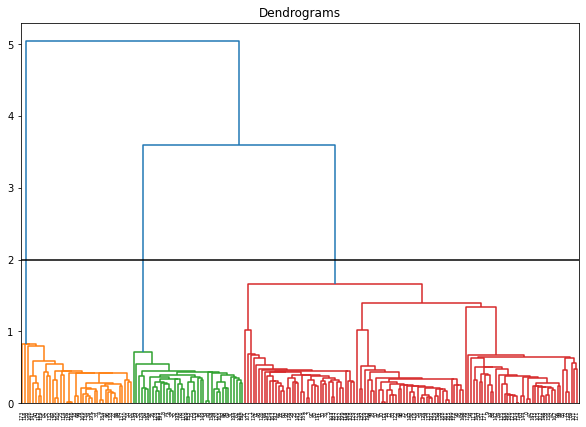

In [15]:
Z = hierarchy.linkage(X, 'single')
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dendrogram = hierarchy.dendrogram(Z)



# Mark the cuts in the tree that signify 3, 4 and 5 clusters.
# Cutting the dendrogram at max_d
plt.axhline(y=2, c='k')
